# Zener Diode

Author : Saman Hooshvar

Contact : saman.hooshvarfeyzabadi@mail.um.ac.ir

## What is a Zener Diode?

Zener diodes are semiconductor devices that **allow current to flow in both directions** but specialize in current flowing in reverse. Also known as breakdown diodes, Zener diodes are the most common electronic components used as stable voltage references for electronic circuits.

American physicist, Dr. Clarence Melvin Zener, first described the electronic properties of Zener diodes while researching the breakdown mechanisms of semiconductor materials. As a theoretical physicist at Bell Labs in New Jersey, he wrote a research paper later published in 1934, identifying a type of electrical breakdown later known as the Zener effect. These specific processes were named after him in the years afterward in his honor.

![zenerdiode](zener-diodes-blog-infographic-update-2024.png)

## How does a Zener diode work?

Current going across the terminals in reverse bias (backward) is called the **Zener effect**. When voltage potential is met, this causes the Zener voltage ($ V_z$)/breakdown voltage. **Zener diodes uniquely consist of a heavily doped P-N junction that allows current to flow in reverse when reaching $V_z$.** A well-defined $V_z $ can conduct current continuously in reverse bias without getting damaged. Current then increases to a maximum level determined by a series resistor and stabilizes, remaining constant over a range of applied voltages. Therefore, **Zener diodes are applicable for use as voltage regulators**.

A Zener diode operates within the normal range of forward bias, with a turn-on voltage between 0.3V and 0.7V. When connected in reverse bias, the current flows backward, thus causing a small leakage of current to flow. As the reverse voltage increases to the arranged Vz, current flows throughout the diode. Current increases to a maximum decided by the series resistor and then stabilizes to remain constant over a range of applied voltages.

Zener diodes have **two breakdown effects**. Knowing these two effects help with understanding their functionality. **First is the Zener effect, prevalent in voltages below 5.5V** and involves a tunneling effect to cause the breakdown. **The second is the avalanche breakdown or impact ionization which occurs in voltages above 5.5V**. These breakdowns both result in the same behavior, and they do not require different circuitry, but each does have a different temperature coefficient. The Zener effect has an anode (negative) terminal temperature coefficient, while the avalanche has a cathode (positive) terminal temperature coefficient. Both temperature effects are almost equal to 5.5V. They cancel each other out, making Zener diodes rated at around 5.5V and stable over a wide range of temperature requirements.

Think of a Zener diode like two diodes in parallel, facing opposite directions. The voltage that's forward bias in a Zener diode has a voltage drop of 1V needed for the diode to turn on for the current to flow. The forward voltage is forward biased. The current flowing backward is considered the Zener voltage or reversed biased due to its properties. An example of the Zener voltage is 3.3V. For the current to flow across the diode, the current must maintain at least a minimum of this voltage. Having a predictable voltage drop makes Zener diodes not only useful as voltage regulators, but a correctly set Zener diode may limit the voltage of other devices.

## Circuit Symbol of Zener Diode

Zener diodes come in various packaging options, depending on their power dissipation requirements. Some are designed for high-power applications, while others are available in surface mount formats. The most commonly used Zener diode is packaged in a small glass enclosure, with a distinctive band indicating the cathode side of the diode.

![zenerdiode2](Zener-diode-2.png)

## V-I Characteristics of Zener Diode

The diagram given below shows the V-I characteristics of the Zener diode.

![zenercurve](zener-diode-diagram.png)


- **Current $I_z$ (max):** Maximum current at the rated Zener Voltage (Vz – 200μA to 200A).

- **Current $I_z$ (min):** Minimum current value required for a diode to break down.

- **Forward Bias:** Voltage going across a diode that allows the current to flow easily in one direction.

- **Power Rating:** Denotes the maximum power the Zener diode can dissipate and is a product of the diode voltage/current flowing through it.

- **Reverse Bias/Zener Effect:** Voltage going across a diode in the opposite direction of forward bias, this particular voltage doesn't cause any detectable current to flow, changes AC to DC current, and manipulates other electronic signals.

- **Temperature Stability:** Diodes around 5V have the best stability.

- **Voltage Tolerance:** Typically ±5%

- **Zener/Breakdown Voltage ($V_z$):** This is the minimum voltage that causes a portion of an insulator to experience a breakdown and become electrically conductive. Voltage ranges from 2.4V to 200V and can go up to 1kV, while the maximum for the surface-mounted device is 47V.

- **Zener Resistance ($ R_z$):** The resistance exhibited to the Zener diode.


## Zener diode charactristic curve using PySPice

Below is the characteristic curve of a zener diode using pyspice.

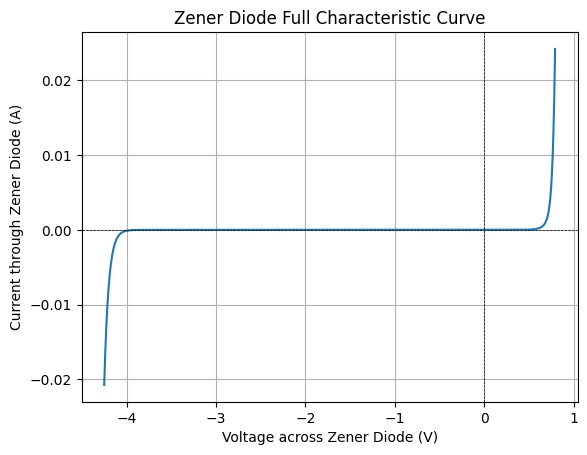

In [2]:
from PySpice.Probe.Plot import plot
from PySpice.Spice.Netlist import Circuit
from PySpice.Unit import *
import matplotlib.pyplot as plt

# Create the circuit
circuit = Circuit('Zener Diode Full Characteristics')

# Include the SPICE model directly
circuit.include('C:/Users/Sazgar/PycharmProjects/Sample/spice_models/1N4743.lib')

# Define components
circuit.V(1, 'input', circuit.gnd, 0@u_V)  # Voltage source
circuit.R(1, 'input', 'zener', 1@u_kΩ)     # Series resistor
circuit.D(1, 'zener', circuit.gnd, model='D1N4731')  # Correct model name

# Run the DC Sweep Simulation (Include Reverse Bias)
simulator = circuit.simulator(
    temperature=25, nominal_temperature=25, compatibility_mode=True)
analysis = simulator.dc(V1=slice(-25, 25, 0.1))  # Sweep from -25V to 25V

# Get the voltage arrays
zener_voltage = analysis.nodes['zener']
source_voltage = analysis.nodes['input']

# Calculate the current through the resistor
current = (source_voltage - zener_voltage) / (1@u_kΩ)

# Plot the characteristic curve
plt.figure()
plt.plot(zener_voltage.as_ndarray(), current.as_ndarray())
plt.title('Zener Diode Full Characteristic Curve')
plt.xlabel('Voltage across Zener Diode (V)')
plt.ylabel('Current through Zener Diode (A)')
plt.axhline(0, color='black', linewidth=0.5, linestyle='--')  # Add x-axis
plt.axvline(0, color='black', linewidth=0.5, linestyle='--')  # Add y-axis
plt.grid()
plt.show()


## Zener diode application

- **Surge Suppressor:** An electrical device, also known as a surge protector, that is used to protect equipment against power surges and voltage spikes while blocking voltage over a safe threshold of approximately 120V.

- **Switching Signals**: An output signal switching device (or OSSD) is an electronic device in a machine's safety system that provides a coded signal that, when interrupted due to a safety event, signals the machine to shut down. This helps avoid a stray signal operating a machine during unsafe conditions.

- **Voltage Regulator:** When the load voltage equals the Zener voltage of the diode, the series-connected resistors limit the current through the diode. This serves to regulate voltage when there is an excess amount of voltage while the diode is conducting. The diode generates noise which can be suppressed by adding a large value decoupling capacitor across the diode.

- **Voltage Shifter:** When applied to a circuit with a resistor, Zener diodes act as voltage shifters. The circuit lowers the output voltage equal to the diodes’ Zener voltage.

- **Waveform Clipper:** Reshapes a signal and prevents voltage spikes from affecting circuits connected to a power supply. 

## Zener diode problems

### Problem 1

For the circuit shown in Fig.1 (i), find : (i) the output voltage (ii) the voltage drop across series resistance (iii) the current through zener diode.

![ex1](ex1.png)

#### Solution

If you remove the zener diode in Fig. 1, the voltage V across the open-circuit is given by :

$V = \frac{R_L E_i}{R+R_L} = \frac{10*120}{5+10} = 80V $

Since voltage across zener diode is greater than $V_Z$ (= 50 V), the zener is in the “on” state. It can, therefore, be represented by a battery of $50V$ as shown in.

![ex1](ex1-2.png)

So the answer to (i) is:

$V_{out} = V_Z = 50V$

Answer to (ii) is:

Voltage drop across $R = V_{in} - V_z = 120 - 50 = 70V$

Answer to (iii) is:

$I_L = \frac{V_Z}{R_L} = \frac{50}{10} = 5mA$

$I_R = \frac{70}{5} = 14mA$

By apllying KCL we have:

$I = I_L + I_Z$
$I_z = I-I_L = 14-5 = 9mA$

### Problem 2

A 7.2 V zener is used in the circuit shown in Fig. 3 and the load current is to vary from 12 to 100 mA. Find the value of series resistance R to maintain a voltage of 7.2 V across the load. The input voltage is constant at 12V and the minimum zener current is 10 mA.

![zener2](ex2.png)

#### Solution

$E_i = 12V$

$V_z = 7.2V$

$R = \frac{E_i - E_0}{I_Z + I_L} $

The voltage across R is to remain constant at 12 − 7.2 = 4.8 V as the load current changes from 12 to 100 mA. **The minimum zener current will occur when the load current is maximum.**

$R = \frac{E_i - E_0}{(I_Z)_{min} + (I_L)_{max}} = \frac {12-7.2}{(10+100)mA} = \frac{4.8}{110} = 43.5 Ω$

If R = 43.5 Ω is inserted in the circuit, the output voltage will remain constant over the regulating range. As the load current $I_L$ decreases, the zener current $I_Z$ will increase to such a value that $I_Z + I_L = 110 mA.$

Note that if load resistance is open-circuited, then $I_L = 0$ and zener current becomes 110 mA.

### Problem 3

The zener diode shown in Fig. 4 has $V_Z = 18 V$. The voltage across the load stays at 18 V as long as $I_Z$ is maintained between 200 mA and 2 A. Find the value of series  resistance R so that $E_0$ remains 18 V while input voltage $E_i$ is free to vary between 22 V to 28V.

![ex3](ex3.png)

#### Solution

The zener current will be minimum (i.e. 200 mA) when the input voltage is minimum (i.e. 22 V). The load current stays at constant value $I_L = \frac{V_Z}{R_L} = 1 A = 1000 mA.$

$R = \frac{E_i - E_0}{(I_Z)_{min} + (I_L)_{max}} = \frac{22-18}{200+100} = 3.33Ω $


## Conclusion

Some notable manufacturers of Zener diodes include Nexperia, Vishay, ROHM, and Toshiba. These manufacturers produce Zener diodes for use in a variety of electronic components specializing in industries like consumer electronics, automotive, telecommunications, computing, industrial, and more. Zener diodes are small components that play a big role in the devices that serve industry professionals and everyday consumers and they will continue to do so for years to come.

## Refrences

1 - https://www.tti.com/content/ttiinc/en/resources/blog/what-is-a-zener-diode.html

2 - https://en.wikipedia.org/wiki/Zener_diode

3 - https://byjus.com/physics/zener-diode/

4 - https://electronicspost.com/solved-problems-on-zener-diode/